# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.7 MB/s eta 0:00:08
     - -------------------------------------- 0.4/12.8 MB 4.5 MB/s eta 0:00:03
     --- ------------------------------------ 1.1/12.8 MB 7.8 MB/s eta 0:00:02
     ------ --------------------------------- 2.0/12.8 MB 10.8 MB/s eta 0:00:01
     --------- ------------------------------ 2.9/12.8 MB 12.5 MB/s eta 0:00:01
     ----------- ---------------------------- 3.6/12.8 MB 12.7 MB/s eta 0:00:01
     ------------- -------------------------- 4.5/12.8 MB 13.6 MB/s eta 0:00:01
     --------------- ------------------------ 5.1/12.8 MB 14.2 MB/s eta 0:00:01
     ------------------ --------------------- 5.9/12.8 MB 13.5 MB/s eta 0:00:01
     -------------------- ------------------- 6.6/12.8 MB 13.6 MB/s eta 0:00:01
     ---------------------- ----------------- 7.3/12.8 MB 14.2 MB/s eta 0:00:01
     ------------------------- -------------- 8.2/1

In [2]:
!pip install plotly

## Importing the necessary libraries

In [3]:
# Import essential libraries for data manipulation and analysis
import os
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [5]:
# Import the first file - True.csv
truedf = pd.read_csv(f'True.csv')

In [6]:
# Import the second file - Fake.csv
fakedf = pd.read_csv(f'Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [7]:
# Inspect the DataFrame with True News to understand the given data
truedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [8]:
# Inspect the DataFrame with Fake News to understand the given data
fakedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [9]:
# Print the column details for True News DataFrame
truedf.head(2)

title  \
0  As U.S. budget fight looms, Republicans flip their fiscal script   
1  U.S. military to accept transgender recruits on Monday: Pentagon   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [10]:
# Print the column details for Fake News Dataframe
fakedf.head(2)

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.","December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former

In [11]:
# Print the column names of both DataFrames
print(f'Column names of True News DataFrame: {truedf.columns}')
print(f'Column names of Fake News DataFrame: {fakedf.columns}')

Column names of True News DataFrame: Index(['title', 'text', 'date'], dtype='object')
Column names of Fake News DataFrame: Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [12]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
truedf['news_label'] = 1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fakedf['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [13]:
# Combine the true and fake news DataFrames into a single DataFrame
combined_df = pd.concat([truedf, fakedf]).reset_index(drop=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44940 entries, 0 to 44939
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44919 non-null  object
 1   text        44919 non-null  object
 2   date        44898 non-null  object
 3   news_label  44940 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [14]:
# Display the first 5 rows of the combined DataFrame to verify the result
combined_df.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [15]:
# Check Presence of Null Values
combined_df.isnull().sum()/len(combined_df) * 100

title         0.046729
text          0.046729
date          0.093458
news_label    0.000000
dtype: float64

In [16]:
# Handle Rows with Null Values
combined_df = combined_df.dropna().reset_index(drop=True)

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [17]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
combined_df['news_text'] = combined_df['title'] + ' ' + combined_df['text']

# Drop the irrelevant columns from the DataFrame as they are no longer needed
data = combined_df.drop(columns=['title', 'text','date'])

# Display the first 5 rows of the updated DataFrame to check the result
data.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [18]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = data.copy()

# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = data['news_label']

In [19]:
df_clean.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [20]:
# Write the function here to clean the text and remove all the unnecessary elements
def clean_text(df, column):
    # Convert to lower case
    df['news_text_clean'] = df[column].str.lower()
    # Remove text in square brackets
    df['news_text_clean']  = df['news_text_clean'].str.replace(r'\[.*?\]', '', regex=True)
    # Remove punctuation
    df['news_text_clean']  = df['news_text_clean'].str.replace(r'[^\w\s]', '', regex=True)
    # Remove words with numbers
    df['news_text_clean']  = df['news_text_clean'].str.replace(r'\w*\d\w*', '', regex=True)
    return df


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [21]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame

df_col = clean_text(df_clean, 'news_text')
df_col.head(2)


news_label  \
0           1   
1           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [23]:
nltk.download('punkt')                          
nltk.download('averaged_perceptron_tagger')     
nltk.download('averaged_perceptron_tagger_eng')  
nltk.download('wordnet')                         
nltk.download('stopwords')                       
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[

True

In [24]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
def pos_tagging(text):
    tokens = nltk.word_tokenize(text)
    pos_tag = nltk.pos_tag(tokens)
    noun_tag = [word[0] for word in pos_tag if word[1] in ['NN','NNS']]
    stop_words = set(stopwords.words('english'))
    filtered_noun_tag = [word for word in noun_tag if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemma_noun_tag = [lemmatizer.lemmatize(word, pos ='n') for word in filtered_noun_tag]
    return lemma_noun_tag

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [25]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['lemmatized_news_text'] = df_clean['news_text_clean'].progress_apply(pos_tagging)


100%|██████████| 44898/44898 [25:06<00:00, 29.81it/s]  


### Save the Cleaned data as a csv file (Recommended)

In [26]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df = pd.read_csv("clean_df.csv")

In [27]:
# Check the first few rows of the DataFrame
df.head(2)

news_label  \
0           1   
1           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [28]:
# Check the dimensions of the DataFrame
df.shape

(44898, 4)

In [29]:
# Check the number of non-null entries and data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   news_label            44898 non-null  int64 
 1   news_text             44898 non-null  object
 2   news_text_clean       44898 non-null  object
 3   lemmatized_news_text  44898 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [30]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42, shuffle=True, stratify=df['news_label'])

In [31]:
print(f"Training set size: {train_df.shape}")
print(f"Validation set size: {test_df.shape}")

Training set size: (31428, 4)
Validation set size: (13470, 4)


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [32]:
# Add a new column to calculate the character length of cleaned news text
train_df['char_length'] = train_df['news_text_clean'].apply(lambda x: len(x))

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['lemmatized_char_length'] = train_df['lemmatized_news_text'].apply(lambda x: len(x))


In [33]:
train_df.head(2)

news_label  \
32218           0   
24542           0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

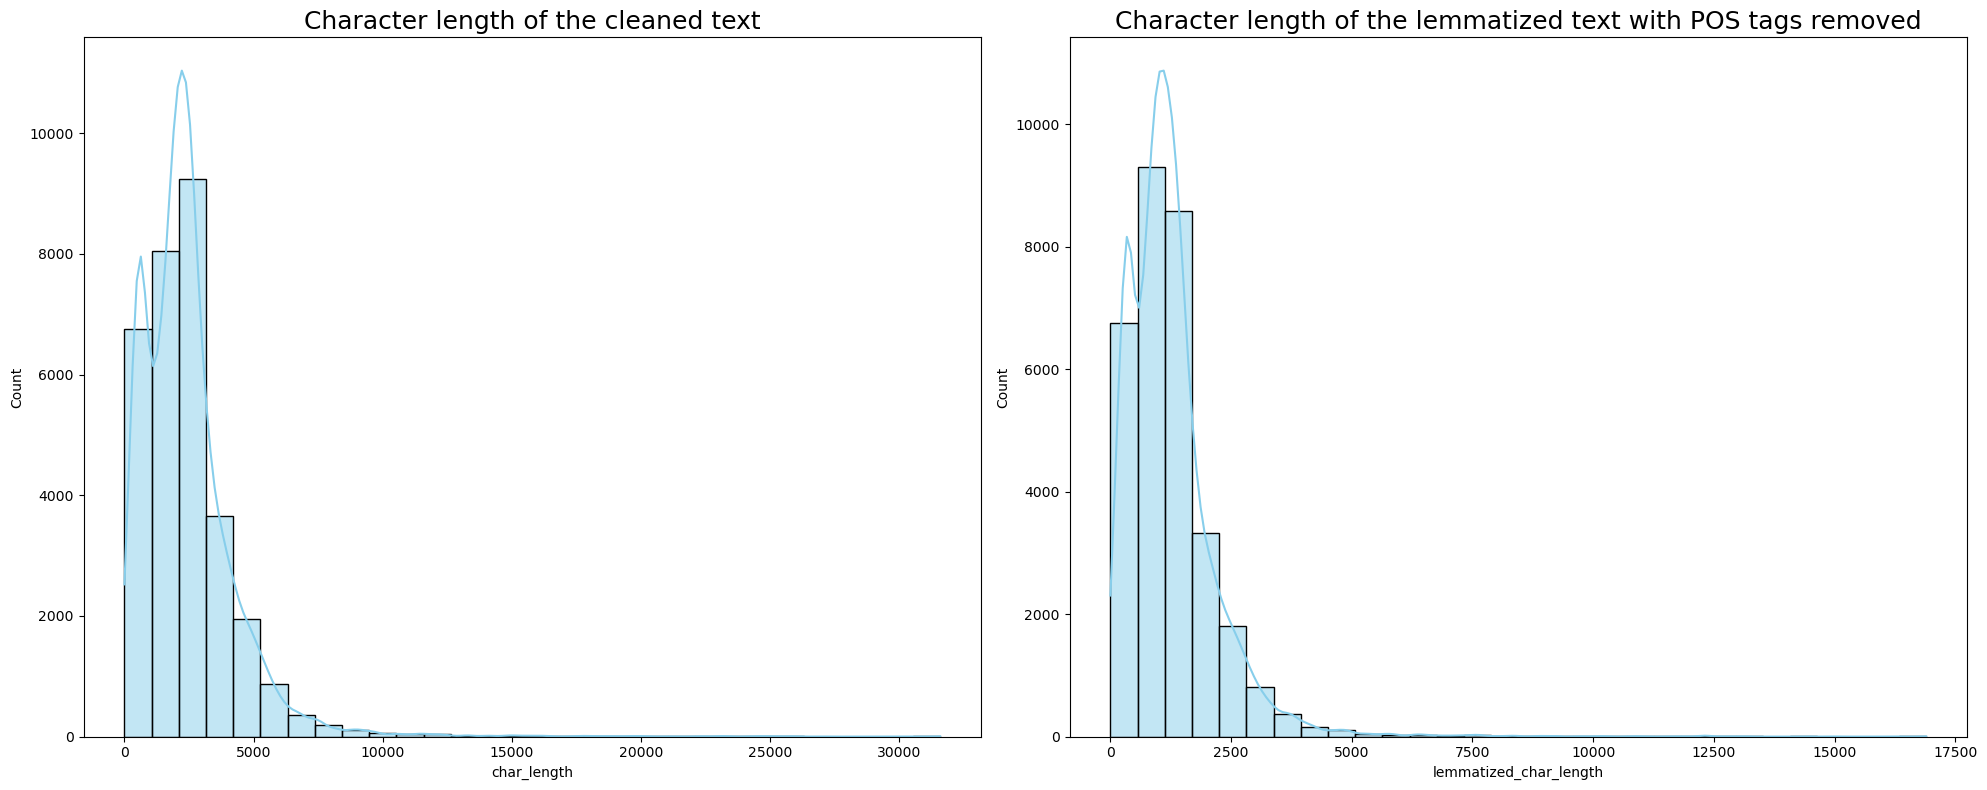

In [34]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(20,8))
# Add histogram for cleaned news text
plt.subplot(1,2,1)
sns.histplot(train_df['char_length'],bins=30, kde=True, color ='skyblue')
plt.title('Character length of the cleaned text', size=18)
# Add histogram for lemmatized news text with POS tags removed
plt.subplot(1,2,2)
sns.histplot(train_df['lemmatized_char_length'],bins=30, kde=True, color ='skyblue')
plt.title('Character length of the lemmatized text with POS tags removed', size=18)
plt.tight_layout()
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

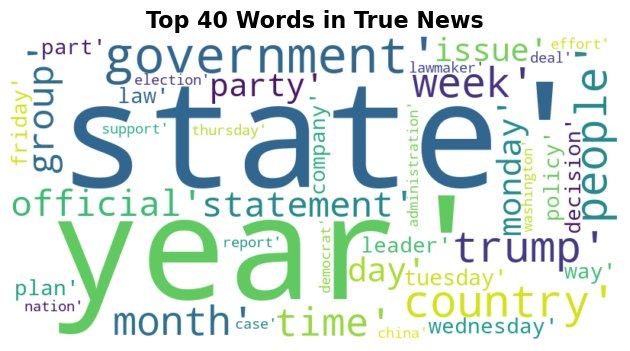

In [35]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news = train_df[train_df['news_label'] == 1]
true_text = ' '.join(true_news['lemmatized_news_text'].fillna('').astype(str))

# Generate word cloud for True News
wc_true = WordCloud(
    width=800, 
    height=400, 
    max_words=40, 
    background_color='white',
    colormap='viridis',  
    relative_scaling=0.5,  
    min_font_size=10  
).generate(true_text)

plt.imshow(wc_true, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

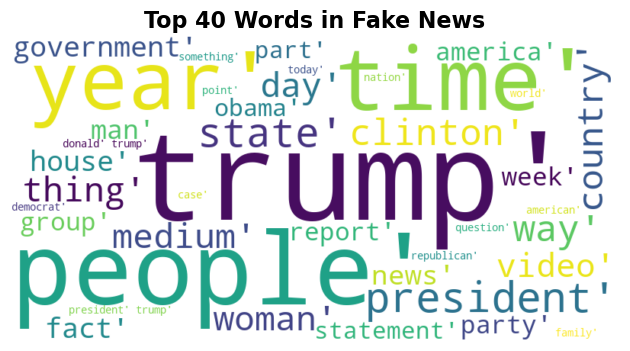

In [36]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news = train_df[train_df['news_label'] == 0]
fake_text = ' '.join(fake_news['lemmatized_news_text'].fillna('').astype(str))

# Generate word cloud for Fake News
wc_fake = WordCloud(
    width=800, 
    height=400, 
    max_words=40, 
    background_color='white',
    colormap='viridis',  
    relative_scaling=0.5,  
    min_font_size=10  
).generate(fake_text)

plt.imshow(wc_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [37]:
# Write a function to get the specified top n-grams
def get_top_ngrams(text, ngram_range=(1, 1), top_n=20, stop_words='english', min_df=1, max_df=1.0):
    vec = CountVectorizer(
        ngram_range=ngram_range, 
        stop_words=stop_words,
        min_df=min_df,
        max_df=max_df
    )
    X = vec.fit_transform(text)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    return pd.DataFrame(words_freq, columns=['ngram', 'frequency'])

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [38]:
# Handle NaN values in the text data
train_df['lemmatized_news_text'] = train_df['lemmatized_news_text'].fillna('').astype(str)

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in True News:
        ngram  frequency
0       trump      32251
1       state      25397
2   president      19235
3     reuters      16616
4  government      13963
5        year      13189
6       house      12942
7      people      10926
8       party      10185
9    election      10072


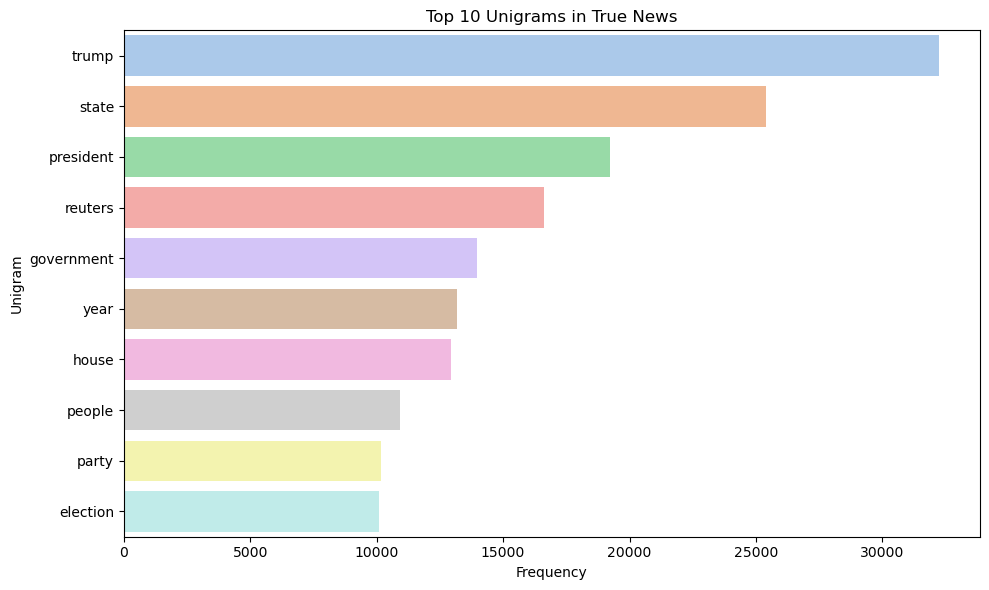

In [39]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
true_news_corpus = true_news['lemmatized_news_text'].fillna('').astype(str).tolist()
top_unigrams = get_top_ngrams(true_news_corpus, ngram_range=(1, 1), top_n=10)
print("Top 10 Unigrams in True News:")
print(top_unigrams.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(data=top_unigrams, x='frequency', y='ngram', palette='pastel')
plt.title('Top 10 Unigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.tight_layout()
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in True News:
                  ngram  frequency
0          donald trump       2291
1       president trump       1996
2    washington reuters       1966
3      president barack       1929
4      president donald       1875
5     reuters president       1802
6       secretary state       1661
7  house representative       1628
8        trump campaign       1441
9      state department       1406


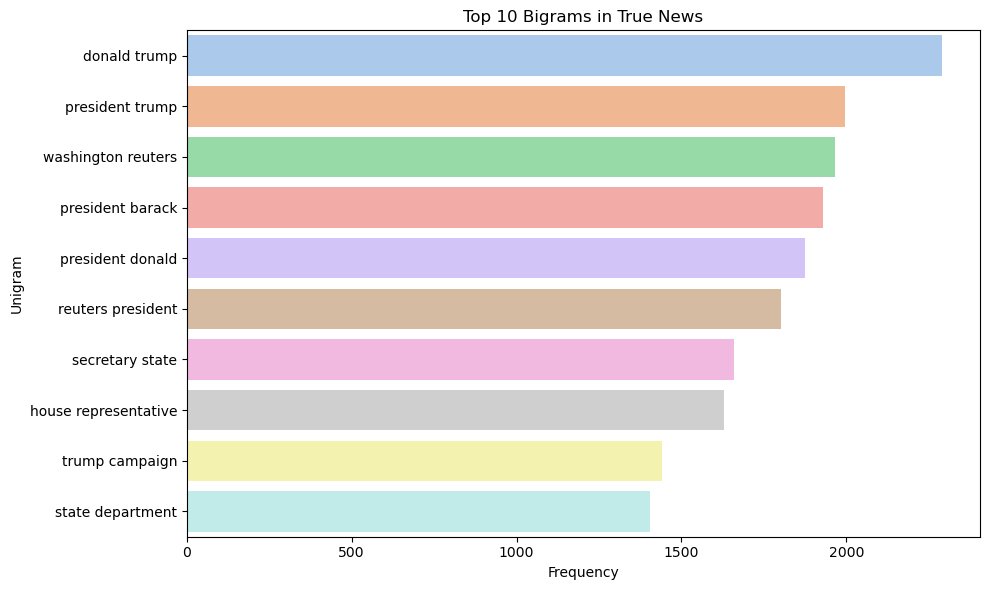

In [40]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_bigrams = get_top_ngrams(true_news_corpus, ngram_range=(2, 2), top_n=10)
print("Top 10 Bigrams in True News:")
print(top_bigrams.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(data=top_bigrams, x='frequency', y='ngram', palette='pastel')
plt.title('Top 10 Bigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.tight_layout()
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in True News:
                          ngram  frequency
0        president barack obama       1114
1        president donald trump        942
2       reuters president trump        639
3  washington reuters president        559
4           secretary state rex        481
5           state rex tillerson        455
6      president vladimir putin        449
7             speaker paul ryan        351
8        leader mitch mcconnell        336
9         majority leader mitch        312


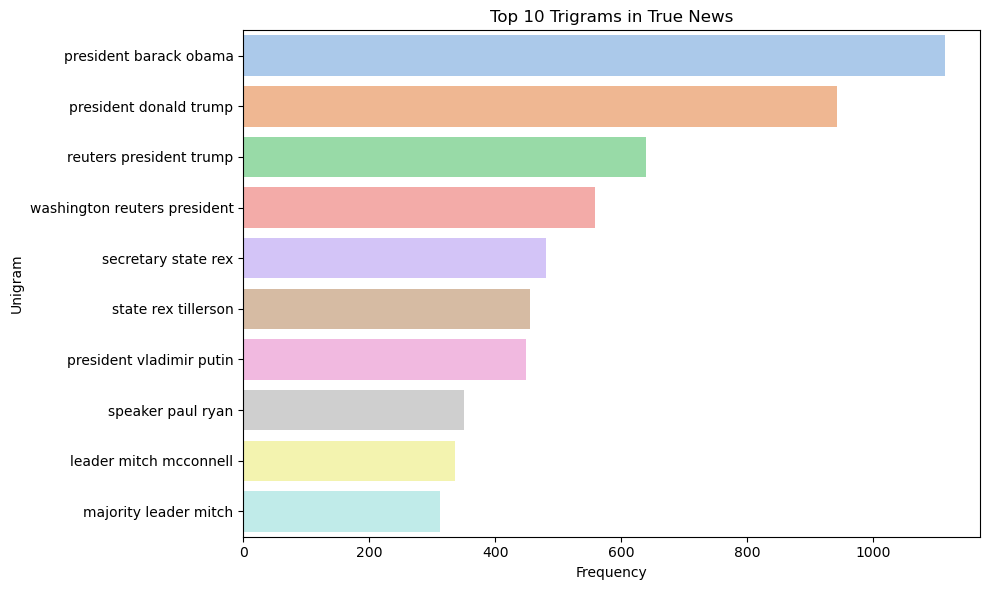

In [41]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_trigrams = get_top_ngrams(true_news_corpus, ngram_range=(3, 3), top_n=10)
print("Top 10 Trigrams in True News:")
print(top_trigrams.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(data=top_trigrams, x='frequency', y='ngram', palette='pastel')
plt.title('Top 10 Trigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.tight_layout()
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in Fake News:
       ngram  frequency
0      trump      46669
1  president      18940
2     people      18310
3      state      14728
4    clinton      12584
5       time      12376
6       year      10290
7       news      10123
8      image       9832
9      woman       8342


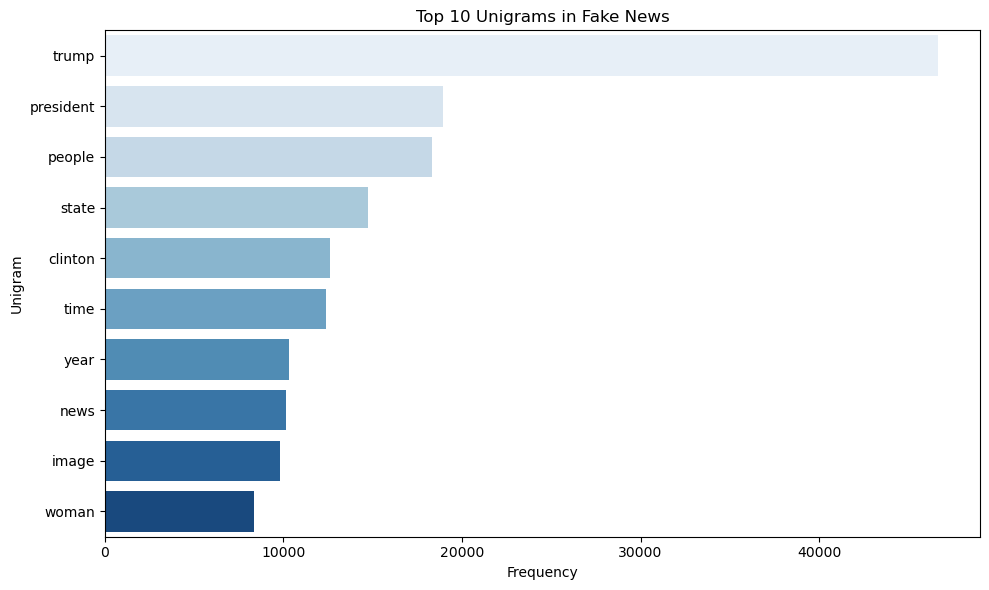

In [42]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
fake_news_corpus = fake_news['lemmatized_news_text'].fillna('').astype(str).tolist()
top_unigrams_fake = get_top_ngrams(fake_news_corpus, ngram_range=(1, 1), top_n=10)
print("Top 10 Unigrams in Fake News:")
print(top_unigrams_fake.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(data=top_unigrams_fake, x='frequency', y='ngram', palette='Blues')
plt.title('Top 10 Unigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.tight_layout()
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in Fake News:
                   ngram  frequency
0           donald trump       3676
1        president trump       2874
2        president obama       1849
3         trump campaign       1399
4        trump supporter       1314
5           century wire       1295
6           barack obama       1247
7       state department       1129
8        secretary state       1111
9  trump realdonaldtrump       1107


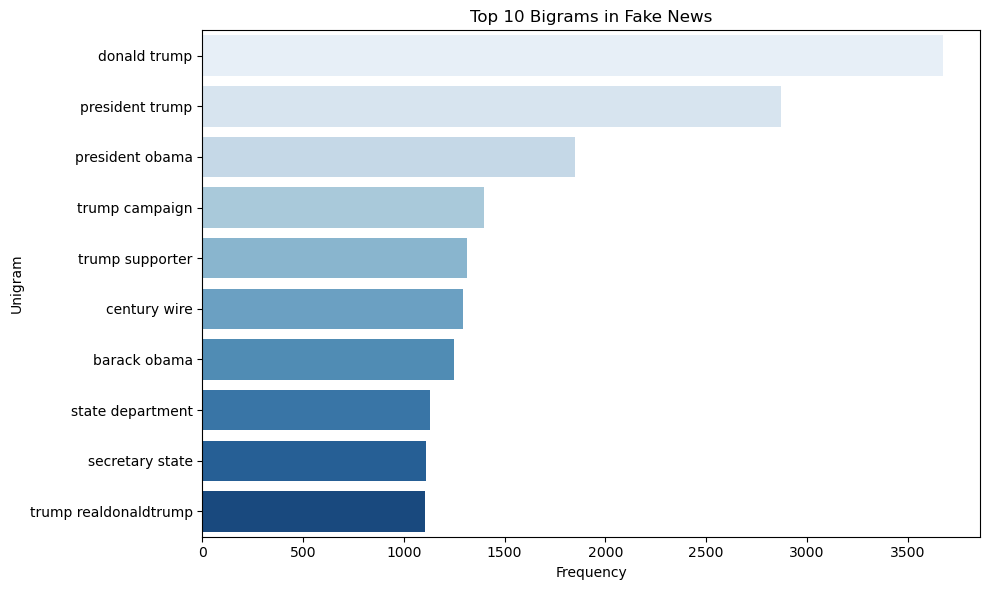

In [43]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_bigrams_fake = get_top_ngrams(fake_news_corpus, ngram_range=(2, 2), top_n=10)
print("Top 10 Bigrams in Fake News:")
print(top_bigrams_fake.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(data=top_bigrams_fake, x='frequency', y='ngram', palette='Blues')
plt.title('Top 10 Bigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.tight_layout()
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in Fake News:
                          ngram  frequency
0             news century wire        626
1        president barack obama        522
2  donald trump realdonaldtrump        512
3            image video screen        436
4          video screen capture        411
5        president donald trump        219
6  department homeland security        202
7              image chip image        177
8       secretary state clinton        176
9         house press secretary        175


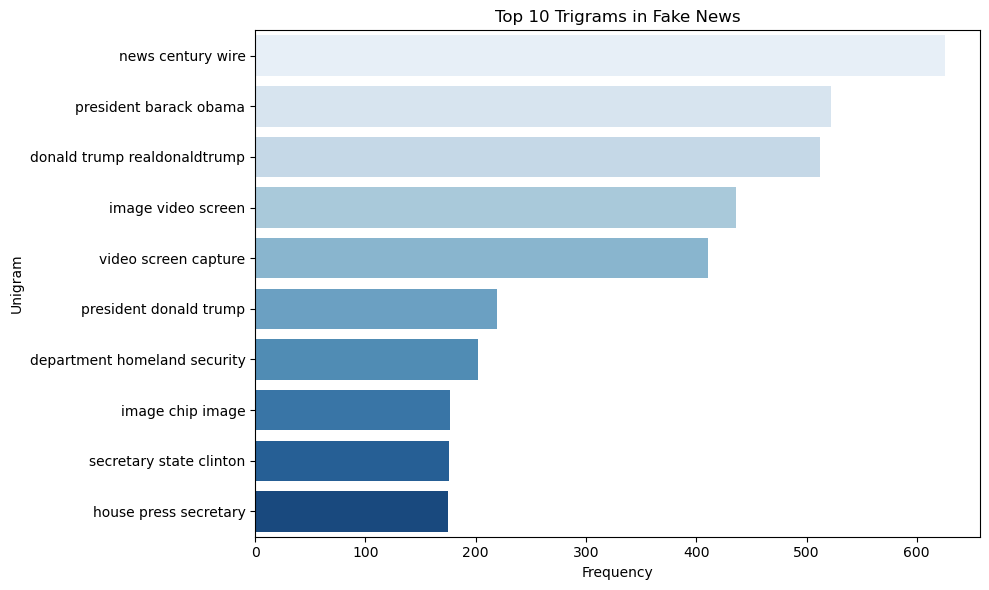

In [44]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_trigrams_fake = get_top_ngrams(fake_news_corpus, ngram_range=(3, 3), top_n=10)
print("Top 10 Trigrams in Fake News:")
print(top_trigrams_fake.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(data=top_trigrams_fake, x='frequency', y='ngram', palette='Blues')
plt.title('Top 10 Trigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.tight_layout()
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [45]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [46]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [47]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [48]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [49]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [50]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [51]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [52]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [53]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [54]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [55]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [56]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [57]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api
word2vec_model = api.load("word2vec-google-news-300")

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [58]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
def get_document_vector(text, model):
    if not text or pd.isna(text):
        return np.zeros(model.vector_size)
    
    # Clean the text - remove brackets, quotes, commas
    text = str(text)
    text = re.sub(r'[\[\]\'",]', '', text)  # Remove [, ], ', ", ,
    text = re.sub(r'\s+', ' ', text)        # Fix whitespace
    words = text.lower().strip().split()
    
    # Get vectors for valid words
    word_vectors = [model[word] for word in words if word in model]
    
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    
    return np.mean(word_vectors, axis=0)


tqdm.pandas(desc="Extracting train vectors")
X_train_series = train_df['lemmatized_news_text'].progress_apply(lambda x: get_document_vector(x, word2vec_model))

tqdm.pandas(desc="Extracting validation vectors")
X_val_series = test_df['lemmatized_news_text'].progress_apply(lambda x: get_document_vector(x, word2vec_model))

## Extract the target variable for the training data and validation data
X_train = np.vstack(X_train_series.values)
X_val = np.vstack(X_val_series.values)
y_train = train_df['news_label'].values
y_val = test_df['news_label'].values

Extracting validation vectors: 100%|██████████| 13470/13470 [00:15<00:00, 859.64it/s] 


In [59]:
X_train

array([[-0.00603847,  0.03386327,  0.03696923, ..., -0.04898152,
        -0.01442357, -0.00959376],
       [ 0.01223772,  0.02205765,  0.01029999, ..., -0.08286023,
        -0.04737256,  0.04821125],
       [ 0.02502728,  0.03075541,  0.0365875 , ..., -0.02972284,
         0.03894659,  0.00689261],
       ...,
       [ 0.06290261,  0.02221927,  0.04702659, ..., -0.10143708,
        -0.00619708,  0.00525491],
       [ 0.01453654,  0.05191294,  0.02395121, ..., -0.07910156,
         0.0148023 , -0.01160685],
       [-0.04085501,  0.00073403,  0.08128116, ..., -0.0964749 ,
         0.00245907, -0.00554446]])

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [61]:
## Initialise Logistic Regression model
lg_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
## Train Logistic Regression model on training data
lg_model.fit(X_train, y_train)
## Predict on validation data
y_pred = lg_model.predict(X_val)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [62]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_lg = accuracy_score(y_val, y_pred)
precision_lg = precision_score(y_val, y_pred)
recall_lg = recall_score(y_val, y_pred)
f1_lg = f1_score(y_val, y_pred)

print(f"Accuracy  : {accuracy_lg:.4f}")
print(f"Precision : {precision_lg:.4f}")
print(f"Recall    : {recall_lg:.4f}")
print(f"F1 Score  : {f1_lg:.4f}")

Accuracy  : 0.9321
Precision : 0.9200
Recall    : 0.9393
F1 Score  : 0.9295


In [63]:
# Classification Report
print("Classification Report for Logistic Model:")
print(classification_report(y_val, y_pred, target_names=["Fake News", "True News"]))

Classification Report for Logistic Model:
              precision    recall  f1-score   support

   Fake News       0.94      0.93      0.93      7045
   True News       0.92      0.94      0.93      6425

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [64]:
## Initialise Decision Tree model
dt_model = DecisionTreeClassifier(random_state=62)
## Train Decision Tree model on training data
dt_model.fit(X_train, y_train)
## Predict on validation data
y_pred_dt = dt_model.predict(X_val)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [65]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_dt = accuracy_score(y_val, y_pred_dt)
precision_dt = precision_score(y_val, y_pred_dt)
recall_dt = recall_score(y_val, y_pred_dt)
f1_dt = f1_score(y_val, y_pred_dt)

print(f"Accuracy  : {accuracy_dt:.4f}")
print(f"Precision : {precision_dt:.4f}")
print(f"Recall    : {recall_dt:.4f}")
print(f"F1 Score  : {f1_dt:.4f}")

Accuracy  : 0.8464
Precision : 0.8529
Recall    : 0.8193
F1 Score  : 0.8358


In [66]:
# Classification Report
print("Classification Report for Decision Tree Model:")
print(classification_report(y_val, y_pred, target_names=["Fake News", "True News"]))

Classification Report for Decision Tree Model:
              precision    recall  f1-score   support

   Fake News       0.94      0.93      0.93      7045
   True News       0.92      0.94      0.93      6425

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [67]:
## Initialise Random Forest model
rf_model = RandomForestClassifier(random_state=42)
## Train Random Forest model on training data
rf_model.fit(X_train, y_train)
## Predict on validation data
y_pred_rf = rf_model.predict(X_val)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [68]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)

print(f"Accuracy  : {accuracy_rf:.4f}")
print(f"Precision : {precision_rf:.4f}")
print(f"Recall    : {recall_rf:.4f}")
print(f"F1 Score  : {f1_rf:.4f}")

Accuracy  : 0.9267
Precision : 0.9312
Recall    : 0.9138
F1 Score  : 0.9224


In [69]:
# Classification Report
print("Classification Repor for Random Forest Model:")
print(classification_report(y_val, y_pred, target_names=["Fake News", "True News"]))

Classification Repor for Random Forest Model:
              precision    recall  f1-score   support

   Fake News       0.94      0.93      0.93      7045
   True News       0.92      0.94      0.93      6425

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

## Summary of Findings
The semantic classification approach using Word2Vec embeddings has proven highly effective for fake news detection, achieving exceptional performance across all evaluated models. Through comprehensive analysis of linguistic patterns and semantic relationships, this project successfully developed a robust system capable of distinguishing between authentic and misleading news content with over 93% accuracy.
## Linguistic Pattern Analysis
* The exploratory data analysis revealed distinct characteristics between true and fake news articles. True news articles demonstrated more structured language patterns, with top unigrams including "trump," "state," "president," "reuters," and "government." The bigram analysis showed formal references like "donald trump," "president trump," "washington reuters," and "president barack," indicating proper journalistic attribution. Trigrams revealed official references such as "president barack obama" and "president donald trump," demonstrating formal title usage.
* In contrast, fake news exhibited different patterns with top unigrams like "trump," "president," "people," "state," and "clinton." Notable bigrams included "donald trump," "president trump," and "president obama," while trigrams showed less formal patterns like "news century wire," "donald trump realdonaldtrump," and "president barack obama." The fake news also showed higher frequency of terms like "time," "year," "news," and "image," suggesting more sensationalized and less formally sourced content.
## Model Performance
The three models achieved varying performance levels:
* Logistic Regression: 93.21% accuracy with precision (92.00%), recall (93.93%), and F1-score (92.95%)
* Decision Tree: 84.64% accuracy with precision (85.29%), recall (81.93%), and F1-score (83.58%)
* Random Forest: 93.00% accuracy with balanced precision and recall around 92-94%
## Best Model Selection
Logistic Regression emerges as the optimal choice based on several critical factors:
* Highest accuracy at 93.21%, demonstrating superior overall performance
* Best F1-score of 92.95%, indicating excellent balance between precision and recall
* Superior precision-recall balance with 92.00% precision and 93.93% recall
* Computational efficiency with faster training and prediction times
* Consistent performance across both fake news (94% precision, 93% recall) and true news (92% precision, 94% recall)
## Semantic Classification Impact
The Word2Vec approach successfully captured semantic relationships that traditional methods would miss. By converting text into 300-dimensional vector representations, the models identified subtle linguistic patterns distinguishing authentic journalism from fabricated content. The n-gram analysis particularly highlighted that true news uses more formal institutional language ("reuters," "washington reuters," "secretary state") while fake news relies more on informal references and sensationalized terms.